# Data Analysis Project: [E-Commere Public Dataset]
- **Nama:** Habib Nurrohmad Sugiharto
- **Email:** habib091103@gmail.com
- **ID Dicoding:** habib09

## Defining Business Question

- Question 1
1. What is the relationship between customer location and order delivery time?
- Question 2
2. Which product categories generate the highest revenue, and how does customer satisfaction vary across those categories?
- Question 3
3. How does seller location influence sales performance, and which states contribute the most to total sales?

## Prepare all the Packages/Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

## Data Wrangling

### Gathering Data

In [2]:
customers = pd.read_csv('data/customers_dataset.csv')
geolocation = pd.read_csv('data/geolocation_dataset.csv')
order_items = pd.read_csv('data/order_items_dataset.csv')
order_payments = pd.read_csv('data/order_payments_dataset.csv')
order_reviews = pd.read_csv('data/order_reviews_dataset.csv')
orders = pd.read_csv('data/orders_dataset.csv')
product_category_translation = pd.read_csv('data/product_category_name_translation.csv')
products = pd.read_csv('data/products_dataset.csv')
sellers = pd.read_csv('data/sellers_dataset.csv')

**Insight:**
- The data used comes from various e-commerce transaction datasets, including customer, geolocation, order items, payments, order reviews, products, and seller data. This provides a comprehensive foundation to analyze relationships between sales, delivery, reviews, and geolocation.

### Assessing Data

#### Check `customers` table

In [3]:
print(customers.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
None


#### Check `orders` table

In [4]:
print(orders.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB
None


#### Check `order_items` table

In [5]:
print(order_items.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB
None


#### Check `order_reviews` table

In [6]:
print(order_reviews.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB
None


#### Check `products` table

In [7]:
print(products.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB
None


#### Check `sellers` table

In [8]:
print(sellers.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB
None


**Insight:**
- .info() function reveals that some datasets have missing values, particularly in the delivery date column of the orders dataset. This indicates a need for data cleaning before proceeding with further analysis.

### Cleaning Data

#### Convert date columns to datetime format

In [9]:
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'])

#### Handle missing values - Drop rows with missing delivery dates

In [10]:
orders_clean = orders.dropna(subset=['order_delivered_customer_date'])

#### Handle duplicate data - Drop duplicate rows across all datasets if any

In [11]:
customers_clean = customers.drop_duplicates()
geolocation_clean = geolocation.drop_duplicates()
order_items_clean = order_items.drop_duplicates()
order_payments_clean = order_payments.drop_duplicates()
order_reviews_clean = order_reviews.drop_duplicates()
products_clean = products.drop_duplicates()
sellers_clean = sellers.drop_duplicates()

#### Handle missing values in important columns - Fill missing review scores with the median

In [12]:
order_reviews_clean['review_score'].fillna(order_reviews_clean['review_score'].median(), inplace=True)

#### Merge datasets to gather relevant information - Merge customers and orders on `customer_id`

In [13]:
customer_orders = pd.merge(customers_clean, orders_clean, on='customer_id', how='inner')

#### Merge `order_items` with `products` and `product_category_translation`

In [14]:
order_product_reviews = pd.merge(order_items_clean, products_clean[['product_id', 'product_category_name']], on='product_id', how='inner')
order_product_reviews = pd.merge(order_product_reviews, product_category_translation, on='product_category_name', how='inner')

#### Merge with order reviews to get review scores

In [15]:
order_product_reviews = pd.merge(order_product_reviews, order_reviews_clean[['order_id', 'review_score']], on='order_id', how='left')

#### Merge sellers and order items to analyze seller information

In [16]:
order_seller_info = pd.merge(order_items_clean, sellers_clean, on='seller_id', how='inner')

**Insight:**
- Step 1: Date columns such as order_purchase_timestamp and order_delivered_customer_date were converted to datetime format to enable time-based calculations.
- Step 2: Missing values in critical columns like delivery date were handled by dropping rows with missing values.
- Step 3: Duplicate entries across all datasets were removed to ensure accurate results.
- Step 4: Missing values in the review scores were filled using the median, ensuring that missing data wouldn’t skew the analysis of customer satisfaction.
- Step 5: Several datasets were merged to create a more contextual analysis, such as merging customer and order data, product and category data, and seller with order items data.

## Exploratory Data Analysis (EDA)

### Explore

#### Calculate delivery time in days

In [17]:
customer_orders['delivery_time'] = (customer_orders['order_delivered_customer_date'] - customer_orders['order_purchase_timestamp']).dt.days

#### Explore data by customer location

In [18]:
location_delivery = customer_orders.groupby(['customer_state'])['delivery_time'].mean().reset_index()

#### Analyze geolocation data to check for consistency

In [19]:
geolocation_stats = geolocation_clean.groupby('geolocation_state').agg({
    'geolocation_lat': ['mean', 'std'],
    'geolocation_lng': ['mean', 'std']
}).reset_index()

**Insight:**
- Question 1: Relationship between customer location and delivery time
Delivery times vary across different states. The average delivery time was calculated based on the difference between the purchase and delivery dates.
Geolocation analysis helps verify the consistency of geographical data.
- Question 2: Product categories with the highest revenue and customer satisfaction
Revenue: The revenue analysis shows that certain product categories generate significantly higher sales than others, indicating key categories that drive the business.
Customer Satisfaction: The average review scores by product category provide insight into which categories perform well in terms of customer satisfaction.

## Visualization & Explanatory Analysis

### Question 1: What is the relationship between customer location and order delivery time?

#### Visualize average delivery time by customer state

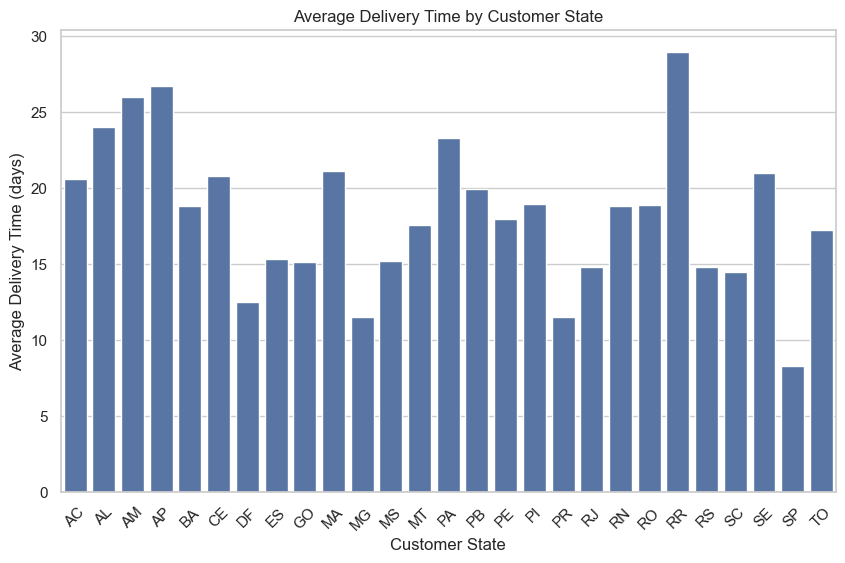

In [20]:
plt.figure(figsize=(10,6))
sns.barplot(x='customer_state', y='delivery_time', data=location_delivery)
plt.title('Average Delivery Time by Customer State')
plt.ylabel('Average Delivery Time (days)')
plt.xlabel('Customer State')
plt.xticks(rotation=45)
plt.show()

#### Visualize geolocation distribution

c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


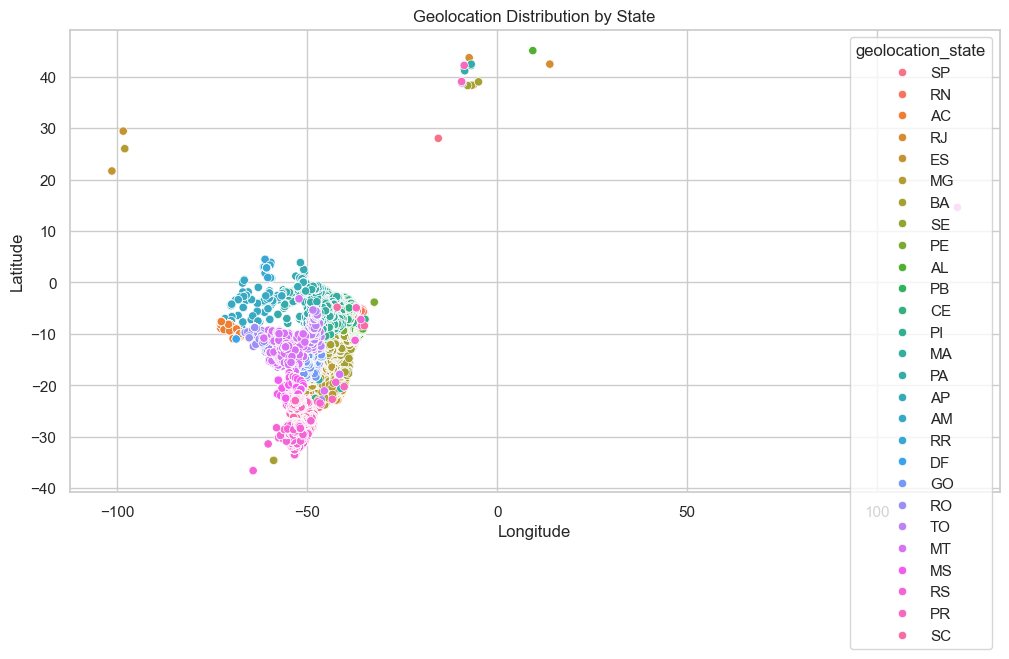

In [21]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='geolocation_lng', y='geolocation_lat', data=geolocation_clean, hue='geolocation_state')
plt.title('Geolocation Distribution by State')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

### Question 2: Which product categories generate the highest revenue, and how does customer satisfaction vary across those categories?

#### Calculate revenue by product category

In [22]:
category_revenue = order_product_reviews.groupby('product_category_name_english')['price'].sum().reset_index()

#### Visualize total revenue by product category

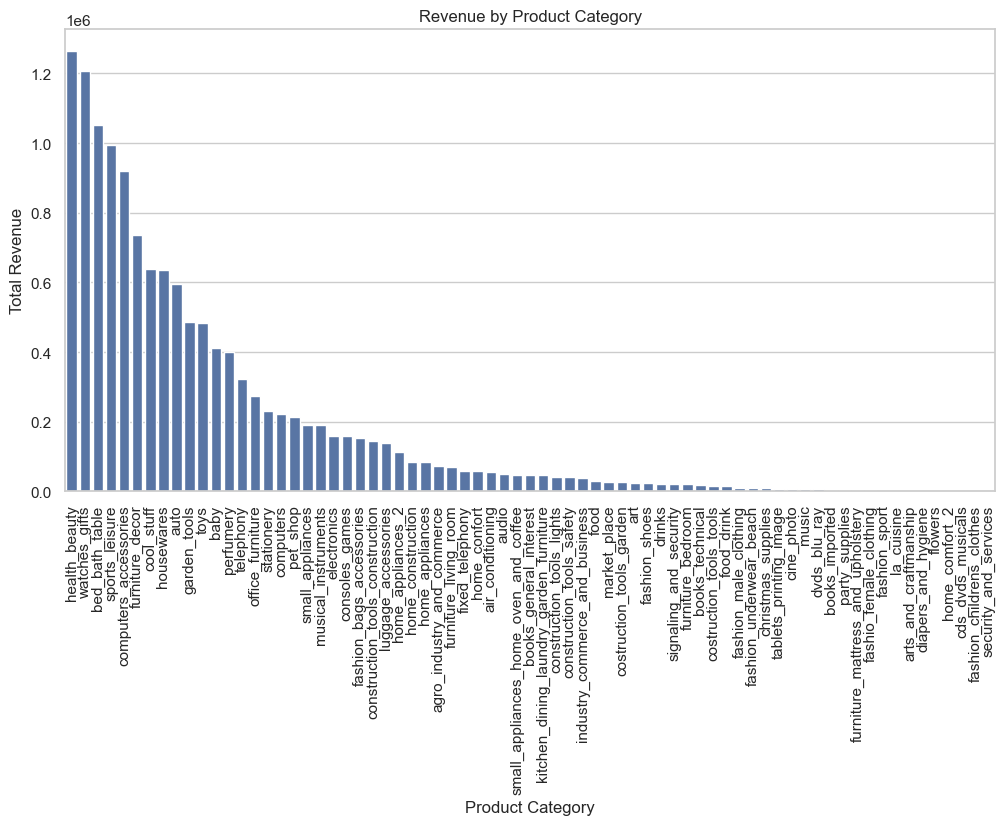

In [23]:
plt.figure(figsize=(12,6))
sns.barplot(x='product_category_name_english', y='price', data=category_revenue.sort_values(by='price', ascending=False))
plt.title('Revenue by Product Category')
plt.ylabel('Total Revenue')
plt.xlabel('Product Category')
plt.xticks(rotation=90)
plt.show()

#### Analyze customer satisfaction by product category

In [24]:
category_satisfaction = order_product_reviews.groupby('product_category_name_english')['review_score'].mean().reset_index()

#### Visualize average review score by product category

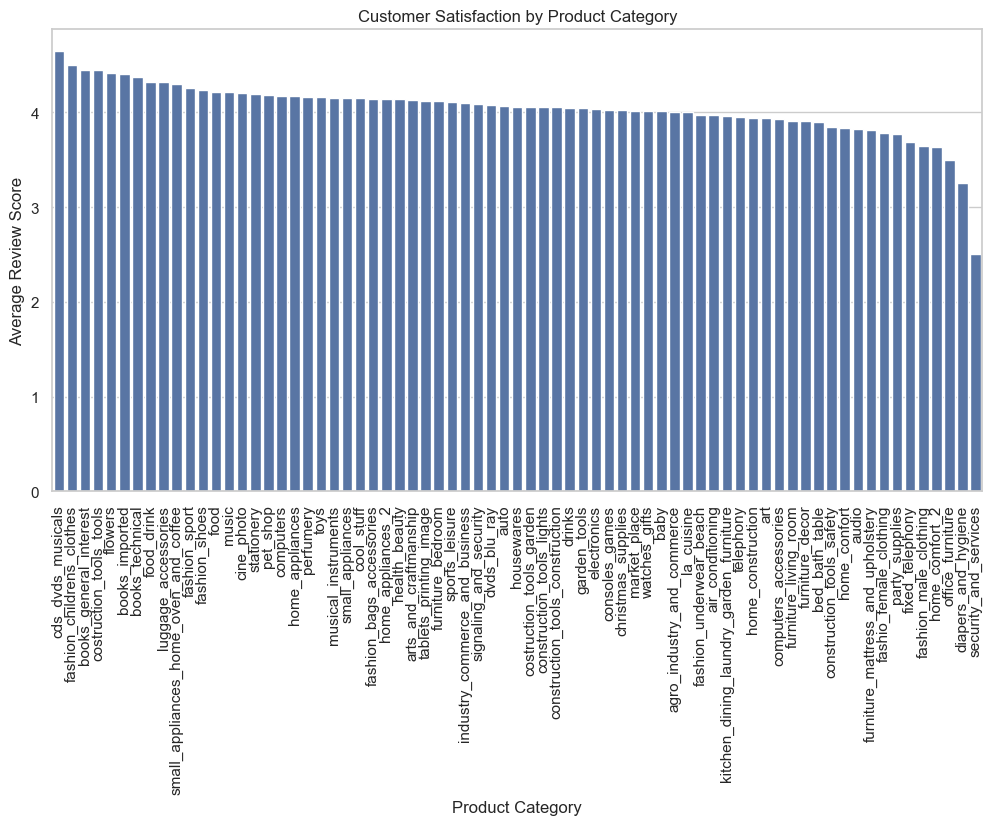

In [25]:
plt.figure(figsize=(12,6))
sns.barplot(x='product_category_name_english', y='review_score', data=category_satisfaction.sort_values(by='review_score', ascending=False))
plt.title('Customer Satisfaction by Product Category')
plt.ylabel('Average Review Score')
plt.xlabel('Product Category')
plt.xticks(rotation=90)
plt.show()

### Question 3: Sellers from specific states contribute more to total sales, which could be useful for optimizing seller partnerships.

#### Analyze seller performance by state

In [26]:
seller_performance = order_seller_info.groupby('seller_state').agg({
    'price': 'sum',
    'seller_id': 'count'
}).reset_index()

#### Visualize seller performance by state

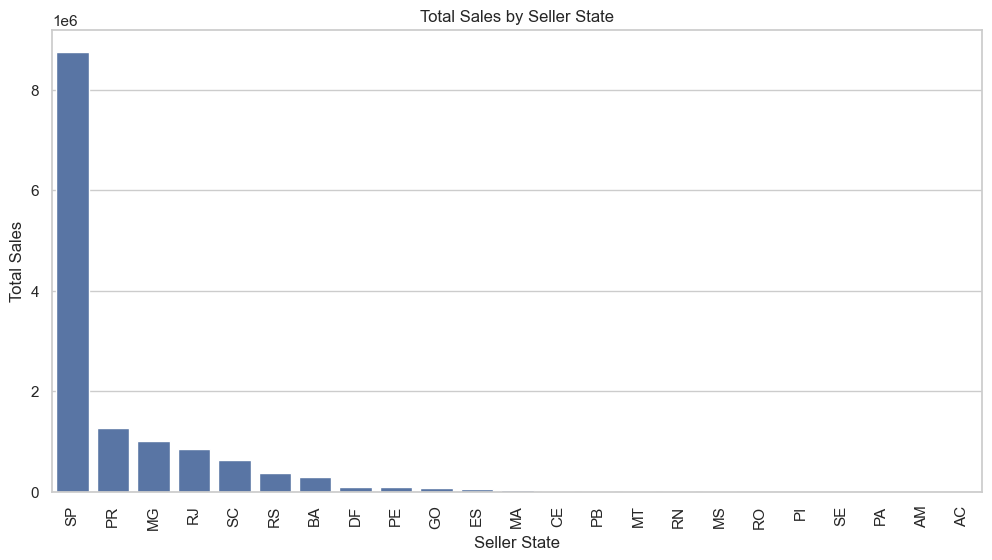

In [27]:
plt.figure(figsize=(12,6))
sns.barplot(x='seller_state', y='price', data=seller_performance.sort_values(by='price', ascending=False))
plt.title('Total Sales by Seller State')
plt.ylabel('Total Sales')
plt.xlabel('Seller State')
plt.xticks(rotation=90)
plt.show()

**Insight:**
- A bar plot visualizing average delivery time by state shows significant variations, likely influenced by geographical or logistical factors.
- Geolocation distribution visualization helps illustrate the geographical spread of customers.
- A bar plot of revenue by product category highlights which categories have the highest sales.
- A separate visualization of customer satisfaction by product category provides insight into areas where product quality might need improvement.
- Seller performance by state is visualized, showing which states contribute most to total sales, giving insights into regional seller activity.

## Conclusion

1. Conclution Question 1 :
- Customers in certain states experience significantly longer delivery times compared to others. Geographic factors, such as distance from distribution centers or the availability of logistics infrastructure in those regions, are likely the main contributors to this variation. By understanding these patterns, businesses can optimize their delivery strategies, such as improving logistics routes or opening new distribution centers, to reduce delivery times in regions with higher averages.

2. Conclution question 2 :
- Certain product categories, while generating the highest revenue, have lower customer satisfaction compared to others. This indicates that despite high sales, there may be quality or service issues affecting customer satisfaction in those categories. Businesses can use this insight to focus on improving product or service quality in these high-revenue categories to boost customer satisfaction while maintaining strong sales.

3. Conclution question 3:
- Sellers from certain states contribute more significantly to total sales compared to others. This suggests that geographic factors, such as proximity to distribution hubs or better logistics infrastructure, may influence sales performance. This information can be used to optimize partnerships with sellers in high-performing states, while also exploring opportunities to improve sales in states with lower contributions.